In [1]:
# Problem 1

Q = 10

d_tilda = (Q * (Q + 3))/2 - 1

print("d_tilda is {}".format(d_tilda))

d_tilda is 64.0


# Answer is [e]

In [2]:
# Problem 2

# Answer is [d] 
# Since logistic regression is on a log scale.

In [3]:
# Problem 3

# Answer is [d] 
# $(E_{out} - E_{in})$ only gives you generalization error at one point in time given $N$ data points.  This is not a good indicator of overfitting (you can have small generalization error and still overfit!).  A better indicator is graphing $E_{out}$ vs regularization parameter $\lambda$ or $C$ and find the lowest $E_{out}$

In [4]:
# Problem 4

# Answer is [d] 
# Stochastic noise is inherently based on the data which is based on the target distribution

In [5]:
# Problem 5

# The answer is [a] 
# The tangent normal vector of $C$ is $w_{lin}\Gamma$ which is greater than the radius of $E_in$ which is $w_{lin}$. (We assume $\Gamma$ is not the zero matrix).  Hence $w_{reg}$ never exceeds $C$.

In [6]:
# Problem 6 

# The answer is [b]
# The whole purpose of the soft-order constraint e.g. $\sum_{q=0}^Q w^2_{q} \leq C$ is to create a formula for $E_{aug}$
# The hard-order constraint e.g. $\sum_{q=0}^Q\gamma_{q} w^2_{q} \leq C$ with some $\gamma_q = 0$ and some $\gamma_q \to \infty$ can be recovered from soft-order constraints but are not explicitely written by them.

In [7]:
# Problem 7 - 10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
url_Train = "http://www.amlbook.com/data/zip/features.train"
train = np.genfromtxt(url_Train)

url_Test = "http://www.amlbook.com/data/zip/features.test"
test = np.genfromtxt(url_Test)

In [9]:
Xtrain = train[:, 1:]
ytrain = train[:, [0]]

Xtest = train[:, 1:]
ytest = train[:, [0]]

In [10]:
Ztrain = np.hstack(
              (np.ones((len(Xtrain), 1)), 
               Xtrain)
         )

Ztest = np.hstack(
              (np.ones((len(Xtest), 1)), 
               Xtest)
        )

In [11]:
def one_vs_all(y, number):
    modified_y = np.where(y==number, 1, -1)
    return modified_y

In [12]:
def regularization(number=0, lambda_reg=1, Ztrain=Ztrain, Ztest=Ztest, ytrain=ytrain, ytest=ytest):
    ytrain = one_vs_all(ytrain, number)
    ytest  = one_vs_all(ytest, number)

    wreg = np.dot(
                  np.dot(np.linalg.inv(np.dot(Ztrain.T, Ztrain) + lambda_reg * np.identity(len(np.dot(Ztrain.T, Ztrain)))), 
                         Ztrain.T), 
                  ytrain)
    
    yhat_train = np.reshape(np.where(np.dot(Ztrain, wreg) > 0, 1, -1), (len(ytrain), 1))
    yhat_test  = np.reshape(np.where(np.dot(Ztest,  wreg) > 0, 1, -1), (len(ytest),  1))
    E_in  = np.mean(yhat_train != ytrain)
    E_out = np.mean(yhat_test  != ytest)
    return(E_in, E_out)

In [ ]:
# problem 7

In [13]:
E_ins_and_numbers = []

for number in range(5,10):
    E_in = regularization(number=number)[0]
    E_ins_and_numbers.append((E_in, number))
    
print("The classifier with the lowest Ein is {}".format(sorted(E_ins_and_numbers)[0][1]))

The classifier with the lowest Ein is 8


# The answer is [d]

In [14]:
Ztrain_transform = np.hstack(
                  (np.ones((len(Xtrain), 1)), 
                   Xtrain, 
                   Xtrain[:, [0]] * Xtrain[:, [1]], 
                   Xtrain[:, [0]]**2, 
                   Xtrain[:, [1]]**2
                  ))

Ztest_transform = np.hstack(
                  (np.ones((len(Xtest), 1)), 
                   Xtest, 
                   Xtest[:, [0]] * Xtest[:, [1]],
                   Xtest[:, [0]]**2, 
                   Xtest[:, [1]]**2
                  ))

In [ ]:
# problem 8

In [15]:
E_outs_and_numbers = []

for number in range(5):
    E_out = regularization(number=number, Ztrain=Ztrain_transform, Ztest=Ztest_transform)[1]
    E_outs_and_numbers.append((E_out, number))
    
print("The classifier with the lowest Eout is {}".format(sorted(E_outs_and_numbers)[0][1]))

The classifier with the lowest Eout is 1


# The answer is [b]

In [ ]:
# problem 9

In [16]:
# part a
E_out_0 = regularization(number=0, Ztrain=Ztrain, Ztest=Ztest)[1]
E_out_0_transform = regularization(number=0, Ztrain=Ztrain_transform, Ztest=Ztest_transform)[1]

E_out_9 = regularization(number=9, Ztrain=Ztrain, Ztest=Ztest)[1]
E_out_9_transform = regularization(number=9, Ztrain=Ztrain_transform, Ztest=Ztest_transform)[1]

print("part a is {}".format(E_out_0 <= E_out_0_transform and E_out_9 <= E_out_9_transform))

# part b
print("part b is {}".format(E_out_0_transform <= 0.95 * E_out_0 and 
                            E_out_9_transform <= 0.95 * E_out_9))

# part c
print("part a is {}".format(E_out_0 == E_out_0_transform and E_out_9 == E_out_9_transform))

# part d
print("part d is {}".format(E_out_0_transform >= 0.95 * E_out_0 and 
                            E_out_9_transform >= 0.95 * E_out_9))

E_out_5 = regularization(number=5, Ztrain=Ztrain, Ztest=Ztest)[1]
E_out_5_transform = regularization(number=5, Ztrain=Ztrain_transform, Ztest=Ztest_transform)[1]

# part e
print("part e is {}".format(E_out_5_transform >= 0.95 * E_out_5 and E_out_5_transform <= E_out_5 ))



part a is False
part b is False
part a is False
part d is False
part e is True


# The answer is [e]

In [17]:
idx_train_1_5   = np.where((train[:, [0]] == 1) | (train[:, [0]] == 5))[0]
idx_test_1_5   = np.where((test[:, [0]] == 1) | (test[:, [0]] == 5))[0]

train_1_5 = train[idx_train_1_5]
test_1_5  = test[idx_test_1_5]

Xtrain_1_5 = train_1_5[:, 1:]
ytrain_1_5 = train_1_5[:, [0]]

Xtest_1_5 = test_1_5[:, 1:]
ytest_1_5 = test_1_5[:, [0]]

Ztrain_transform_1_5 = np.hstack(
                                  (np.ones((len(Xtrain_1_5), 1)), 
                                   Xtrain_1_5, 
                                   Xtrain_1_5[:, [0]] * Xtrain_1_5[:, [1]], 
                                   Xtrain_1_5[:, [0]]**2, 
                                   Xtrain_1_5[:, [1]]**2
                                  ))

Ztest_transform_1_5 = np.hstack(
                                  (np.ones((len(Xtest_1_5), 1)), 
                                   Xtest_1_5, 
                                   Xtest_1_5[:, [0]] * Xtest_1_5[:, [1]],
                                   Xtest_1_5[:, [0]]**2, 
                                   Xtest_1_5[:, [1]]**2
                                  ))

In [ ]:
# problem 10

In [18]:
# part a
E_out_lambda_1 = regularization(number=1, lambda_reg=1, Ztrain=Ztrain_transform_1_5, Ztest=Ztest_transform_1_5, 
                                                        ytrain=ytrain_1_5,           ytest=ytest_1_5)[1]

E_out_lambda_01 = regularization(number=1, lambda_reg=0.01, Ztrain=Ztrain_transform_1_5, Ztest=Ztest_transform_1_5, 
                                                        ytrain=ytrain_1_5,           ytest=ytest_1_5)[1]

print("part a is {}".format(E_out_lambda_1 <= E_out_lambda_01 ))

# part b
E_in_lambda_1 = regularization(number=1, lambda_reg=1, Ztrain=Ztrain_transform_1_5, Ztest=Ztest_transform_1_5, 
                                                        ytrain=ytrain_1_5,           ytest=ytest_1_5)[0]

E_in_lambda_01 = regularization(number=1, lambda_reg=0.01, Ztrain=Ztrain_transform_1_5, Ztest=Ztest_transform_1_5, 
                                                        ytrain=ytrain_1_5,           ytest=ytest_1_5)[0]

print("part b is {}".format(E_in_lambda_1 == E_in_lambda_01 ))

# part c

print("part c is {}".format(E_out_lambda_1 == E_out_lambda_01 ))

# part d

print("part d is {}".format(E_in_lambda_1 > E_in_lambda_01 and E_out_lambda_1 > E_out_lambda_01))

# part e

print("part e is {}".format(E_in_lambda_1 < E_in_lambda_01 and E_out_lambda_1 < E_out_lambda_01))

part a is True
part b is False
part c is False
part d is False
part e is False


# The answer is [a]

In [ ]:
# problem 11

In [19]:
x1, y1 = (1, 0),  -1 
x2, y2 = (0, 1),  -1 
x3, y3 = (0, -1), -1
x4, y4 = (-1, 0), +1 
x5, y5 = (0, 2),  +1 
x6, y6 = (0, -2), +1
x7, y7 = (-2, 0), +1

X = np.vstack((x1, x2, x3, x4, x5, x6, x7))
y = np.vstack((y1, y2, y3, y4, y5, y6, y7))

Ztransform = np.hstack(
                  (np.ones((len(X), 1)), 
                   X[:, [1]]**2 - 2 * X[:, [0]] - 1, 
                   X[:, [0]]**2 - 2 * X[:, [1]] - 1
                  ))

w_3dim_to_2dim = lambda w_3dim:  -(w_3dim/w_3dim[2])[:2]

wa = np.array([-0.5, -1,  1])
wb = np.array([-0.5,  1, -1])
wc = np.array([-0.5,  1,  0])
wd = np.array([-0.5,  0,  1])

# part a
y_hat_a = np.reshape(np.dot(Ztransform, wa), (len(Ztransform), 1)) 
print("part a is {}".format(np.all(y == np.where(y_hat_a > 0, 1, -1))))

# part b
y_hat_b = np.reshape(np.dot(Ztransform, wb), (len(Ztransform), 1)) 
print("part b is {}".format(np.all(y == np.where(y_hat_b > 0, 1, -1))))

# part c
y_hat_c = np.reshape(np.dot(Ztransform, wc), (len(Ztransform), 1)) 
print("part c is {}".format(np.all(y == np.where(y_hat_c > 0, 1, -1))))

# part d
y_hat_d = np.reshape(np.dot(Ztransform, wd), (len(Ztransform), 1)) 
print("part d is {}".format(np.all(y == np.where(y_hat_d > 0, 1, -1))))



part a is False
part b is False
part c is True
part d is False


# answer is [c]

In [ ]:
# problem 12

In [20]:
from svmutil import *   # we'll use this library (LibSVM)in problem 12

from mlpy import LibSvm # this library is an api to LibSVM but 
                        # without the output (I find it annoying)
                        # We'll use this for problems 13-18

X = X.tolist()
y = list(y)


In [21]:
prob = svm_problem(y, X)
param = svm_parameter('-t 1 -c 10000 -d 2 -g 1 -r 1 -q')
m = svm_train(prob, param)

p_label, p_acc, p_val = svm_predict(y, X, m)

num_support_vectors = len(m.get_SV())
print("The number of support vectors is {}".format(num_support_vectors))

Accuracy = 100% (7/7) (classification)
The number of support vectors is 5


# answer is [c]

In [ ]:
# for problems 13-18

In [22]:
distance = lambda X, uk: np.linalg.norm(X - uk) 

In [23]:
get_new_uk = lambda X: np.mean(X, axis=0)

In [24]:
# need to set this to raise the FloatingPointError
# encountered when kmeans doesn't return cluster centers
np.seterr(all='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

# Let's create some sample code to implement Lloyd's algorithm and see whether it works by plotting the clusters and centers (white triangles)
# We'll use parts of the code and implement it in a future function

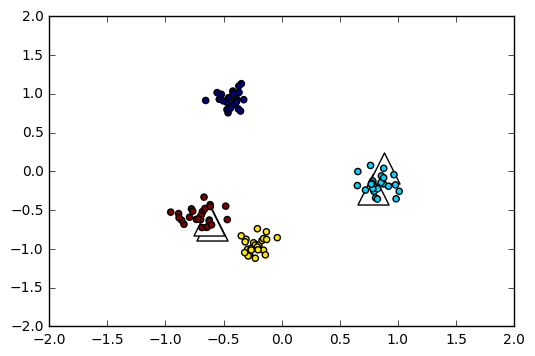

In [25]:
K = 4
n = 25
N = n * K
sigma = 0.1
mu_ks = np.zeros((K, 2))
X = np.zeros((N, 2))
y = np.zeros((N, 1))
for i in range(K):
    mu_ks[i] = np.random.uniform(-1, 1, (1, 2))

    X[i*n:(i+1)*(n)] = np.vstack((np.random.normal(loc=mu_ks[i][0], scale=sigma, size=n), 
                                  np.random.normal(loc=mu_ks[i][1], scale=sigma, size=n))).T
    
    y[i*n:(i+1)*(n)] = i


tol = 1e-8
uk0 = X[np.random.choice(len(X), K, replace=False)]
distances = np.zeros((N, K))
ukt = uk0

try: # to avoid rare times when you kmeans doesn't return cluster centers

    while True:
        for i in range(K):
            distances[:, i] = distance(X, ukt[i])

        uk_id = np.argmin(distances, axis=1)
        ukt_1 = np.full(ukt.shape, np.nan)
        for k in range(K):
            if np.where(uk_id == k)[0].any():
                uk_idx = np.where(uk_id == k)[0]
                ukt_1[k] = get_new_uk(X[uk_idx])

        if np.all(ukt_1 - ukt < tol):
            break
        else:
            ukt = ukt_1
            
except FloatingPointError:
    pass

plt.xlim((-2,2))
plt.ylim((-2,2))
plt.scatter(ukt[:, 0],  ukt[:, 1], marker='^', c='white', s=500)
plt.scatter(X[:, 0],  X[:, 1], c=y)

# It's ok if not all of the centers finds all of the clusters.  That's the randomization aspect.  There are other metrics to improve on this but we will not use them since it doesn't necessarily applies to this problem.

# Let's create our LLoyd's algorithim that returns the cluster centers if given the data points and $K$ the number of clusters.

In [26]:
def kmeans(X, K):   
    tol = 1e-8
    uk0 = X[np.random.choice(len(X), K, replace=False)]
    distances = np.zeros((N, K))
    ukt = uk0
    try: # to avoid rare times when you kmeans doesn't return cluster centers
        while True:
            for i in range(K):
                distances[:, i] = distance(X, ukt[i])

            uk_id = np.argmin(distances, axis=1)
            ukt_1 = np.full(ukt.shape, np.nan)
            for k in range(K):
                if np.where(uk_id == k)[0].any():
                    uk_idx = np.where(uk_id == k)[0]
                    ukt_1[k] = get_new_uk(X[uk_idx])

            if np.all(ukt_1 - ukt < tol):
                break
            else:
                ukt = ukt_1
    except FloatingPointError:
        pass
    return ukt

# Let's create a function that creates a grid test points to test our $E_{out}$

In [30]:
def make_grid(num_points = 100):
    """Creates a grid of points and in the space of [−1, 1] × [−1, 1]
       We will use this to get the area of the negative regions of f(x) and g(x)
    
       Args:
       num_points: represents the refinement of the grid
                   more points ->  more precise area calculation
                   
       returns: N X 2 array representing the space of the graph
    """
    
    line = np.linspace(-1, 1, num_points)
    grid = np.zeros((num_points, num_points, 2))
    
    for i in np.arange(num_points):
        for j in np.arange(num_points):
            grid[i,j] = np.array((line[i], line[j]))
    
    return grid.reshape(-1,2)

# Let's create some code to look at the true $f(x)$ function

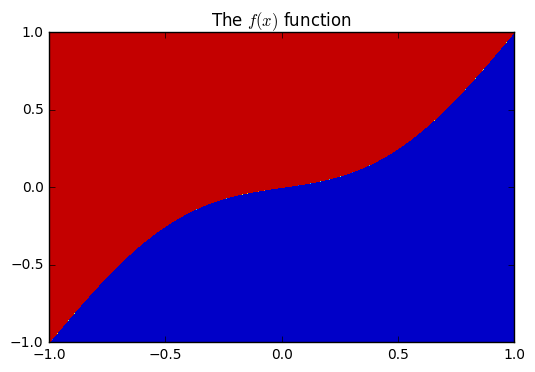

In [86]:
Xcontour = make_grid(50)
ycontour = np.where(Xcontour[:, 1] - Xcontour[:, 0] + 0.25 * np.sin(np.pi * Xcontour[:, 0]) > 0, 1, -1)[:, np.newaxis]

xx, yy = np.meshgrid(np.linspace(-1, 1, len(Xcontour)),
                     np.linspace(-1, 1, len(Xcontour)))

Z = np.where(yy - xx + 0.25 * np.sin(np.pi * xx) > 0, 1, -1)
plt.contourf(xx, yy, Z)
plt.title("The $f(x)$ function")

# Let's create a $N=100$ sample points from $f(x)$

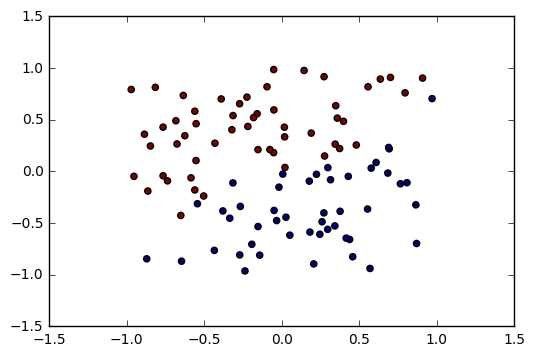

In [27]:
N = 100
X = np.random.uniform(-1, 1, (N, 2))
y = np.where(X[:, 1] - X[:, 0] + 0.25 * np.sin(np.pi * X[:, 0]) > 0, 1, -1)[:, np.newaxis]
plt.scatter(X[:, 0],  X[:, 1], c=y)


# Now let's implement our kmeans function and view the cluster centers

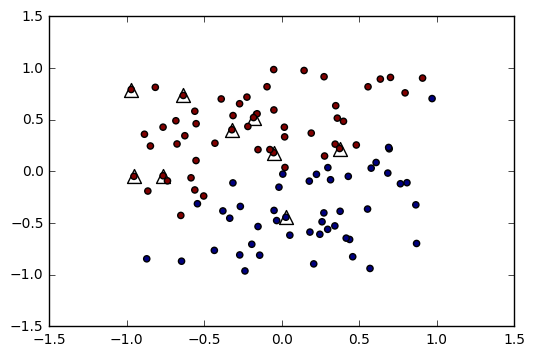

In [28]:
K = 9
uks = kmeans(X, K)
plt.scatter(uks[:, 0],  uks[:, 1], marker='^', c='white', s=100)
plt.scatter(X[:, 0],  X[:, 1], c=y)

# Now let's create some sample code to implement our regular RBF algorithm.
# the algorithm takes $\mathcal X$, $y$, $\gamma$ and $K$ and returns $\mathbf w$

# From $\mathbf w$ we can calculate $E_{in}$ and $E_{out}$

In [29]:
N = 100
K = 9
gamma = 1.5

X = np.random.uniform(-1, 1, (N, 2))
y = np.where(X[:, 1] - X[:, 0] + 0.25 * np.sin(np.pi * X[:, 0]) > 0, 1, -1)[:, np.newaxis]

phi = np.zeros((N, K))
uks = kmeans(X, K)

for j in range(K):
    for i in range(N):
        phi[i, j] = np.exp(-gamma * np.linalg.norm(X[i] - uks[j]) ** 2)
        
w = np.dot(np.dot(np.linalg.inv(np.dot(phi.T, phi)), phi.T), y)

E_in = np.mean(np.where(np.dot(phi, w) > 0, 1, -1) != y)
E_in

0.02

# Let's create our test points

In [31]:
Xtest = make_grid()
ytest = np.where(Xtest[:, 1] - Xtest[:, 0] + 0.25 * np.sin(np.pi * Xtest[:, 0]) > 0, 1, -1)[:, np.newaxis]

# And create a function for creating out random training points

In [34]:
def get_X_y_train(N=100):
    X = np.random.uniform(-1, 1, (N, 2))
    y = np.where(X[:, 1] - X[:, 0] + 0.25 * np.sin(np.pi * X[:, 0]) > 0, 1, -1)[:, np.newaxis]
    return(X, y)   

# And implement them into a helper function that delivers $E_{in}$ and $E_{out}$ for the regular RBF algorithm

In [35]:
def get_Kmeans_error(Xtrain, ytrain, Xtest=Xtest, ytest=ytest, K=9, gamma=1.5):
    Ntrain = len(Xtrain)
    phi_train = np.zeros((Ntrain, K))
    
    Ntest = len(Xtest)
    phi_test = np.zeros((Ntest, K))
    
    uks = kmeans(Xtrain, K)

    for j in range(K):
        for i in range(Ntrain):
            phi_train[i, j] = np.exp(-gamma * np.linalg.norm(Xtrain[i] - uks[j]) ** 2)
            
    for j in range(K):
        for i in range(Ntest):
            phi_test[i, j] = np.exp(-gamma * np.linalg.norm(Xtest[i] - uks[j]) ** 2)

 
    w = np.dot(np.dot(np.linalg.inv(np.dot(phi_train.T, phi_train)), phi_train.T), ytrain)

    E_in  = np.mean(np.where(np.dot(phi_train, w) > 0, 1, -1) != ytrain)
    E_out = np.mean(np.where(np.dot(phi_test, w) > 0, 1, -1) != ytest)
    return E_in, E_out

# We create another helper function that delivers $E_{in}$ and $E_{out}$ for the SVM RBF algorithm

In [36]:
def get_SVM_error(Xtrain, ytrain, Xtest=Xtest, ytest=ytest, gamma=1.5):
    svm = LibSvm(svm_type='c_svc', kernel_type='rbf', gamma=gamma, C=10000)
    svm.learn(Xtrain, ytrain.ravel())
    E_in  = np.mean(svm.pred(Xtrain)!=ytrain.ravel())
    E_out = np.mean(svm.pred(Xtest)!=ytest.ravel())

    return E_in, E_out

In [ ]:
# problem 13

In [37]:
trials = 100
SVM_Eins_greater_than_0 = np.zeros(trials)
for i in range(trials):
    Xtrain, ytrain = get_X_y_train()
    SVM_Eins_greater_than_0[i] = get_SVM_error(Xtrain, ytrain)[0] > 0 
    
print("I get a data set that is not separable by the RBF kernel using hard-margin SVM {}% of the time"
      .format(np.mean(SVM_Eins_greater_than_0 * 100)))

I get a data set that is not separable by the RBF kernel using hard-margin SVM 0.0% of the time


# answer is [a]

In [ ]:
# problem 14

In [38]:
trials = 100
SVM_better_than_regular_Eouts = np.zeros(trials)
for i in range(trials):
    Xtrain, ytrain = get_X_y_train()
    SVM_better_than_regular_Eouts[i] = get_SVM_error(Xtrain, ytrain)[1] < get_Kmeans_error(Xtrain, ytrain)[1]

print("The kernel form beat the regular form {}% of the time".format(np.mean(SVM_better_than_regular_Eouts)*100))

The kernel form beat the regular form 89.0% of the time


# answer is [e]

In [ ]:
# problem 15

In [39]:
trials = 50
SVM_better_than_regular_Eouts = np.zeros(trials)
for i in range(trials):
    Xtrain, ytrain = get_X_y_train()
    SVM_better_than_regular_Eouts[i] = get_SVM_error(Xtrain, ytrain)[1] < get_Kmeans_error(Xtrain, ytrain, K=12)[1]

print("The kernel form beat the regular form {}% of the time".format(np.mean(SVM_better_than_regular_Eouts)*100))

The kernel form beat the regular form 81.0% of the time


# answer is [d]

In [ ]:
# problem 16

In [81]:
trials = 20
E_ins_K_9_K_12  = np.zeros((trials, 2))
E_outs_K_9_K_12 = np.zeros((trials, 2))

for i in range(trials):
    Xtrain, ytrain = get_X_y_train()
    E_ins_K_9_K_12[i]  = get_Kmeans_error(Xtrain, ytrain, K=9)[0], get_Kmeans_error(Xtrain, ytrain, K=12)[0]
    E_outs_K_9_K_12[i] = get_Kmeans_error(Xtrain, ytrain, K=9)[1], get_Kmeans_error(Xtrain, ytrain, K=12)[1]
    
E_ins_K  = np.mean(E_ins_K_9_K_12, axis=0)
E_outs_K = np.mean(E_outs_K_9_K_12, axis=0)

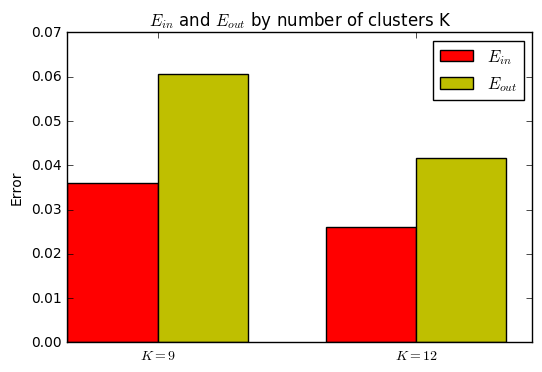

In [82]:
N = 2

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, E_ins_K, width, color='r', yerr=None)

womenMeans = Errors_K_12
rects2 = ax.bar(ind + width, E_outs_K, width, color='y', yerr=None)

# add some text for labels, title and axes ticks
ax.set_ylabel('Error')
ax.set_title('$E_{in}$ and $E_{out}$ by number of clusters K')
ax.set_xticks(ind + width)
ax.set_xticklabels(('$K=9$', '$K=12$'))

ax.legend((rects1[0], rects2[0]), ('$E_{in}$', '$E_{out}$'), loc='best')


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


# [d] Both $E_{in}$ and $E_{out}$ go down

In [ ]:
# problem 17

In [78]:
trials = 20
E_ins_gamma_1_5_gamma_2  = np.zeros((trials, 2))
E_outs_gamma_1_5_gamma_2 = np.zeros((trials, 2))

for i in range(trials):
    Xtrain, ytrain = get_X_y_train()
    E_ins_gamma_1_5_gamma_2[i]  = get_Kmeans_error(Xtrain, ytrain, gamma=1.5)[0], get_Kmeans_error(Xtrain, ytrain, gamma=2)[0]
    E_outs_gamma_1_5_gamma_2[i] = get_Kmeans_error(Xtrain, ytrain, gamma=1.5)[1], get_Kmeans_error(Xtrain, ytrain, gamma=2)[1]
    
E_ins_gamma  = np.mean(E_ins_gamma_1_5_gamma_2, axis=0)
E_outs_gamma = np.mean(E_outs_gamma_1_5_gamma_2, axis=0)

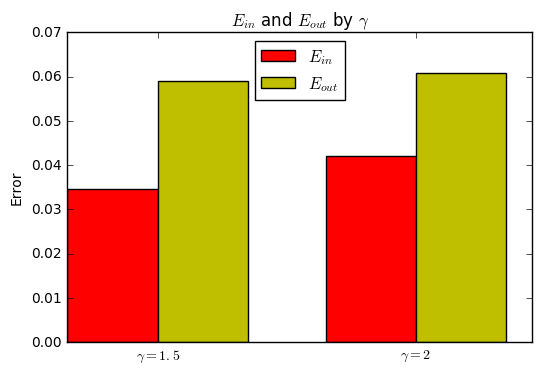

In [79]:
N = 2

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, E_ins_gamma, width, color='r', yerr=None)

womenMeans = Errors_K_12
rects2 = ax.bar(ind + width, E_outs_gamma, width, color='y', yerr=None)

# add some text for labels, title and axes ticks
ax.set_ylabel('Error')
ax.set_title('$E_{in}$ and $E_{out}$ by $\gamma$')
ax.set_xticks(ind + width)
ax.set_xticklabels(('$\gamma=1.5$', '$\gamma=2$'))

ax.legend((rects1[0], rects2[0]), ('$E_{in}$', '$E_{out}$'), loc='best')


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


# [c] Both $E_{in}$ and $E_{out}$ go up

In [ ]:
# problem 18

In [83]:
trials = 100
RBF_Eins_equal_to_0 = np.zeros(trials)
for i in range(trials):
    Xtrain, ytrain = get_X_y_train()
    RBF_Eins_equal_to_0[i] = get_Kmeans_error(Xtrain, ytrain)[0] == 0 
    
print("I get a data set that is separable by the regular RBF kernel using K=9 and gamma=1.5 {}% of the time"
      .format(np.mean(RBF_Eins_equal_to_0 * 100)))

I get a data set that is separable by the regular RBF kernel using K=9 and gamma=1.5 1.0% of the time


# answer is [a]

# Problem 19

# $P(h=f|\mathcal D) \propto P(\mathcal D|h=f)P(h=f)$

# $P(h=f)\sim Uniform(0,1)$

# $P(h=f|\mathcal D) \propto P(\mathcal D|h=f)$

# $\mathcal D$ contains only one data point that has the binary value of 1 or 0 and we know that it's 1.

# This means that $P(\mathcal D=1|h=f) \sim Bernoulli(h) = h^{\mathcal D} (1-h)^{1-\mathcal D} = h$

# $P(h=f|\mathcal D) \propto h \in [0, 1]$ and $h$ is linear and positive (it's not $h^2$, $h^3$ or $-h$)

# The answer is [b]  The posterior increases linearly over [0, 1].





# Problem 20

# This solution is inspired by this [paper](https://groups.csail.mit.edu/sls/publications/1998/icassp98-aggregation.pdf "USING AGGREGATION TO IMPROVE THE PERFORMANCE OF MIXTURE GAUSSIAN ACOUSTIC MODELS")

# $g(\mathbf x) = \frac{1}{2}(g_1(\mathbf x) + g_2(\mathbf x))$ 

# Let $K$ be the number of hypothesis, in this case $K = 2$

# Let $E_{out}(g) = \frac{1}{N}\sum^N_{n=1}(g(\mathbf x_n) − y_n)^2$ where $N$ is the number of data points

# We can then say generally the above equation can be represented by:

# $\frac{1}{K}\sum^K_{k=1}g_k(\mathbf x)$

# with the mean error $\bar E_{out} = \frac{1}{K}\frac{1}{N}\sum^N_{n=1}\sum^K_{k=1}(g_k(\mathbf x_n) − y_n)^2$ 

# $\bar E_{out} = \frac{1}{K}\frac{1}{N}\sum^N_{n=1}\sum^K_{k=1}g^2_k(\mathbf x_n) −2g_k(\mathbf x_n)y_n + y^2_n$ 

# $\bar E_{out} = \frac{1}{N}\sum^N_{n=1}\sum^K_{k=1}\frac{1}{K}g^2_k(\mathbf x_n) −\frac{2}{K}g_k(\mathbf x_n)y_n + \frac{1}{K}y^2_n$ 

# $\bar E_{out} = \frac{1}{N}\sum^N_{n=1}\frac{1}{K}\sum^K_{k=1}g^2_k(\mathbf x_n) −\frac{2}{K}\sum^K_{k=1}g_k(\mathbf x_n)y_n + \frac{1}{K}\sum^K_{k=1}y^2_n$ 

# $\bar E_{out} = \frac{1}{N}\sum^N_{n=1}\color{blue}{\frac{1}{K}\sum^K_{k=1}g^2_k(\mathbf x_n)} −\frac{2}{K}\sum^K_{k=1}g_k(\mathbf x_n)y_n + y^2_n$ 

# Let the aggregate error $\tilde E_{out} = \frac{1}{N}\sum^N_{n=1}(\tilde g(\mathbf x_n) − y_n)^2$ 

# with $\tilde g(\mathbf x_n) = \frac{1}{K}\sum^K_{k=1}g_k(\mathbf x)$

# $\tilde E_{out} = \frac{1}{N}\sum^N_{n=1}\tilde g^2(\mathbf x_n) − 2\tilde g(\mathbf x_n)y_n  + y^2_n$ 

# $\tilde E_{out} = \frac{1}{N}\sum^N_{n=1}(\frac{1}{K}\sum^K_{k=1}g_k(\mathbf x_n))^2 − 2(\frac{1}{K}\sum^K_{k=1}g_k(\mathbf x_n))y_n  + y^2_n$ 

# $\tilde E_{out} = \frac{1}{N}\sum^N_{n=1}\color{red}{\bigl(\frac{1}{K}\sum^K_{k=1}g_k(\mathbf x_n)\bigr)^2} − \frac{2}{K}\sum^K_{k=1}g_k(\mathbf x_n)y_n  + y^2_n$ 

# The only difference between $\tilde E_{out}$ and $\bar E_{out}$ are the highlighted components. Let's see how they relate to each other:

# The Cauchy–Schwartz inequality states that:

# <center>$\left(\sum_{k=1}^K u_k v_k\right)^2\leq \left(\sum_{k=1}^K u_k^2\right) \left(\sum_{k=1}^K v_k^2\right)$</center>

# Let $v_k = 1$

# <center>$\left(\sum_{k=1}^K u_k \right)^2\leq K\left(\sum_{k=1}^K u_k^2\right)$</center>

# comparing both red and blue terms ($\neq_n$ means not necessarily equal):

# <center>$\color{red}{\bigl(\frac{1}{K}\sum^K_{k=1}g_k(\mathbf x_n)\bigr)^2} \neq_n \color{blue}{\frac{1}{K}\sum^K_{k=1}g^2_k(\mathbf x_n)}$</center>

# <center>$\color{red}{\frac{1}{K^2}\bigl(\sum^K_{k=1}g_k(\mathbf x_n)\bigr)^2} \neq_n \color{blue}{\frac{1}{K}\sum^K_{k=1}g^2_k(\mathbf x_n)}$</center>

# <center>$\color{red}{\bigl(\sum^K_{k=1}g_k(\mathbf x_n)\bigr)^2} \neq_n \color{blue}{K\sum^K_{k=1}g^2_k(\mathbf x_n)}$</center>

# Allowing $g_k(\mathbf x_n) = u_k$ yields the Cauchy-Schwartz form above and we can now state:

# <center>$\color{red}{\bigl(\sum^K_{k=1}g_k(\mathbf x_n)\bigr)^2} \leq \color{blue}{K\sum^K_{k=1}g^2_k(\mathbf x_n)}$</center>

# Thus:

# <center> $\tilde E_{out} \leq \bar E_{out}$</center>

# <center> $E_{out}(g) \leq \frac {1}{2}\bigl(E_{out}(g_1) + E_{out}(g_1)\bigr)$</center>

# <center> $E_{out}(g)$ cannot be worse than the average of $E_{out}(g_1)$ and $E_{out}(g_2)$.</center>

# <center> QED </center>

# The answer is [c]